In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as c
import scipy.fftpack as fft
import scipy.ndimage as ndi
import scipy as sp
from PIL import Image

def px_remove(array, x, y):
    temp = array
    temp[y,x]=(temp[y+1,x]+temp[y-1,x]+temp[y,x+1]+temp[y,x-1])/4
    return temp

def px_remove_edge(array, x, y):
    temp = array
    temp[y,x]=(temp[y+1,x]+temp[y-1,x]+temp[y,x-1])/3
    return temp

# Load Data

In [5]:
%matplotlib notebook

num = ['0','20','40','60','80','100']

Image_list = []

for i in np.arange(0,len(num),1):
    pos_im = Image.open("STXM_Data/ZFC_IP_Field_Sweep/TIF_Data/ZFC_IP_"+num[i]+"mT_pos.tif")
    neg_im = Image.open("STXM_Data/ZFC_IP_Field_Sweep/TIF_Data/ZFC_IP_"+num[i]+"mT_neg.tif")
    pos =np.array(pos_im)
    neg =np.array(neg_im)

    pos = np.rot90(pos)
    neg = np.rot90(neg)

    final = pos/neg
    final = np.fliplr(final)
    Image_list.append(final)
    
    im=Image.fromarray(final)
    #im.save("ZFC_images/ZFC_"+str(i)+".tiff")


In [6]:
final_list = []

# Image 1 #
temp1 = px_remove(Image_list[0], 129, 13)
#temp2 = px_remove(temp1, 50, 29)
final_list.append(temp1)

# Image 2 #
temp1 = px_remove(Image_list[1], 92, 17)
#temp2 = px_remove(temp1, 50, 29)
final_list.append(temp1)

# Image 3 #
temp1 = px_remove(Image_list[2], 129, 13)
temp2 = px_remove(temp1, 121, 28)
final_list.append(temp1)

# Image 4 #
temp1 = px_remove(Image_list[3], 6, 31)
temp2 = px_remove(temp1, 181, 21)
final_list.append(temp1)

# Image 5 #
temp1 = px_remove(Image_list[4], 100, 5)
#temp2 = px_remove(temp1, 50, 29)
final_list.append(temp1)

# Image 6 #
temp1 = px_remove(Image_list[5], 1,1)
#temp2 = px_remove(temp1, 50, 29)
final_list.append(temp1)

<IPython.core.display.Javascript object>


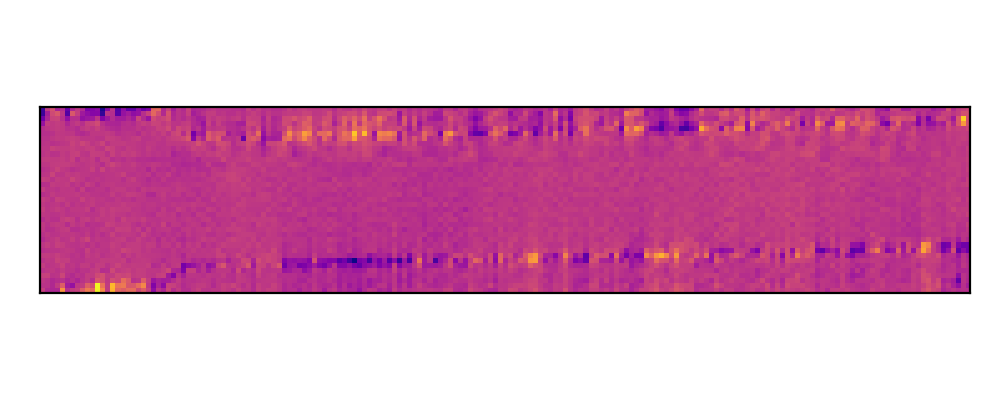

In [7]:

plt.figure(figsize=(5,2))

ax1=plt.subplot2grid((1,1),(0,0), rowspan=1,colspan=1)
plt.imshow(final_list[5][:,:],cmap='plasma')
plt.xticks([])
plt.yticks([])

plt.tight_layout()


<IPython.core.display.Javascript object>


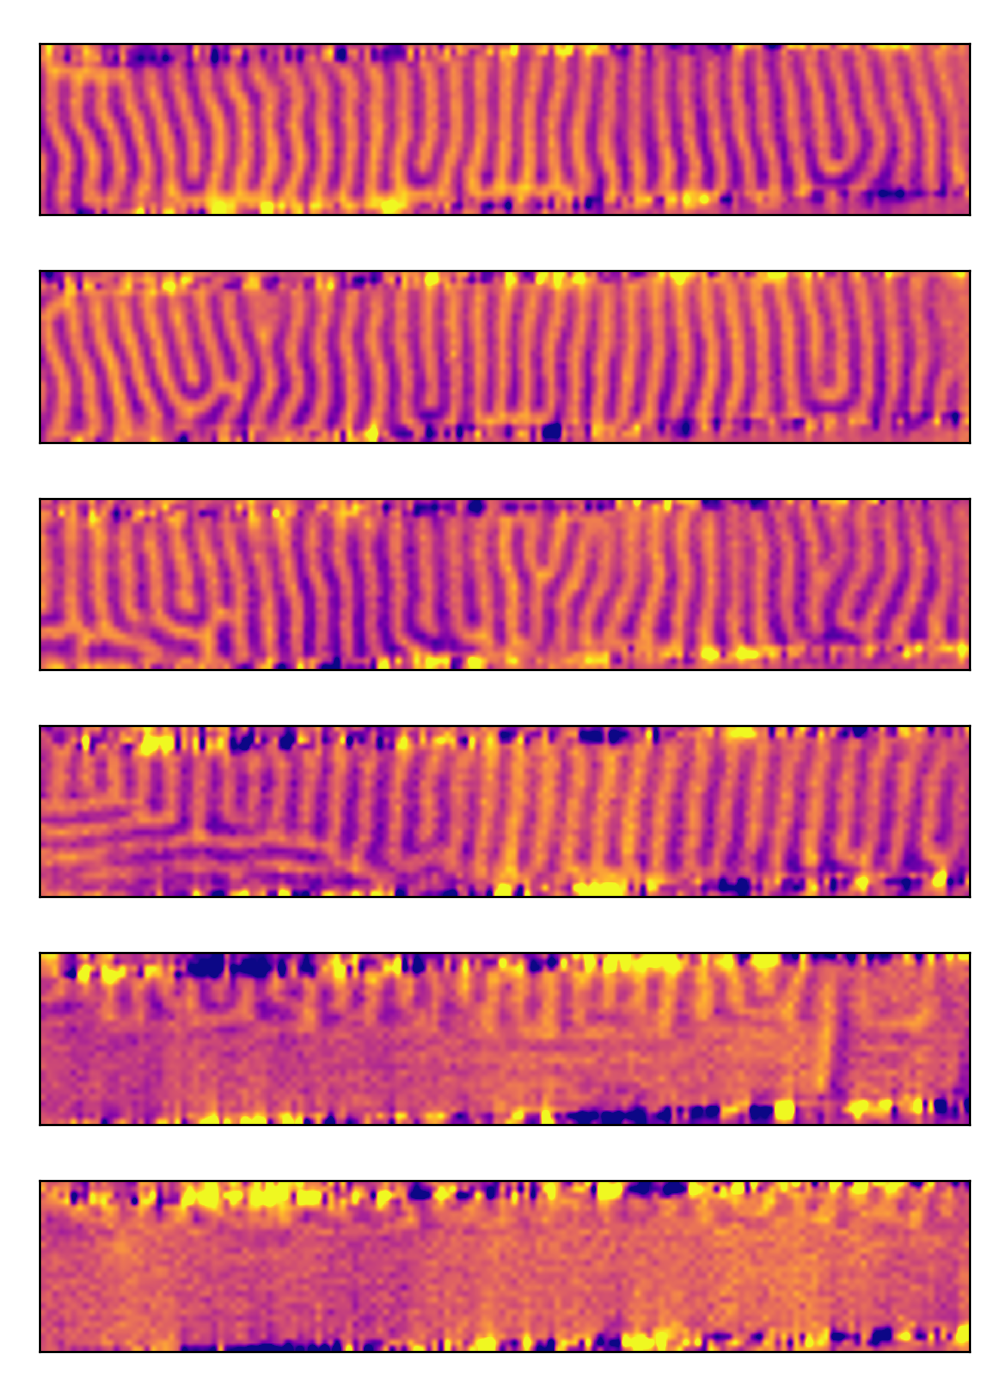

In [8]:

plt.figure(figsize=(5,7))

# Image 1 #
ax1=plt.subplot2grid((6,1),(0,0), rowspan=1,colspan=1)
plt.imshow(final_list[0][3:-6,25:-8],cmap='plasma',interpolation='hamming',vmin=0.92,vmax=1.09)
plt.xticks([])
plt.yticks([])
#plt.colorbar()

# Image 2 #
ax1=plt.subplot2grid((6,1),(1,0), rowspan=1,colspan=1)
plt.imshow(final_list[1][3:-6,25:-8],cmap='plasma',interpolation='hamming',vmin=0.92,vmax=1.08)
plt.xticks([])
plt.yticks([])
#plt.colorbar()

# Image 3 #
ax1=plt.subplot2grid((6,1),(2,0), rowspan=1,colspan=1)
plt.imshow(final_list[2][3:-6,25:-8],cmap='plasma',interpolation='hamming',vmin=0.92,vmax=1.06)
plt.xticks([])
plt.yticks([])
#plt.colorbar()

# Image 4 #
ax1=plt.subplot2grid((6,1),(3,0), rowspan=1,colspan=1)
plt.imshow(final_list[3][3:-6,25:-8],cmap='plasma',interpolation='hamming',vmin=0.95,vmax=1.06)
plt.xticks([])
plt.yticks([])
#plt.colorbar()

# Image 5 #
ax1=plt.subplot2grid((6,1),(4,0), rowspan=1,colspan=1)
plt.imshow(final_list[4][3:-6,25:-8],cmap='plasma',interpolation='hamming',vmin=0.97,vmax=1.06)
plt.xticks([])
plt.yticks([])
#plt.colorbar()

# Image 6 #
ax1=plt.subplot2grid((6,1),(5,0), rowspan=1,colspan=1)
plt.imshow(final_list[5][3:-6,25:-8],cmap='plasma',interpolation='hamming',vmin=0.97,vmax=1.05)
plt.xticks([])
plt.yticks([])
#plt.colorbar()

plt.tight_layout()

plt.savefig('Figure_Panels/Extended_Data_ZFC_IP.png',dpi=300)

<IPython.core.display.Javascript object>


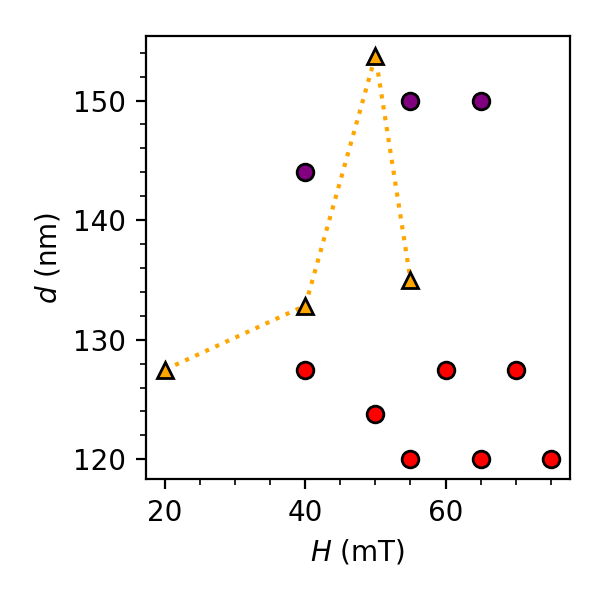

In [180]:
### Line Scan Data ###
H_Fs = [20,40,50,55,]
Heli = np.array([34/8,31/7,(50/10+21/4)/2,18/4,])*30
eHeli = []

C_Fs = [40,50,55,60,65,70,75]
Cone = np.array([17/4,16.5/4,20/5,17/4,16/4,17/4,12/3])*30
eCone = [30/18,30/23,30/11,30/15,30/4]

S_Fs = [40,55,65]
SkT = np.array([24/5,10/2,10/2])*30
eSkT = [30/6]

plt.figure(figsize=(3,3))
ax1=plt.subplot2grid((1,1),(0,0), rowspan=1,colspan=1)

plt.plot(H_Fs,Heli,marker='^',color='orange',markeredgecolor='k',ls=':')
#plt.errorbar(H_Fs,Heli,eHeli,color='k',ls='')
plt.plot(S_Fs,SkT,marker='o',color='purple',markeredgecolor='k',ls='')
#plt.errorbar(S_Fs,SkT,eSkT,color='k',ls='')
plt.plot(C_Fs,Cone,marker='o',color='red',markeredgecolor='k',ls='')



plt.ylabel('$d$ (nm)')
plt.xlabel('$H$ (mT)')
ax1.minorticks_on()
plt.tight_layout()

plt.savefig('distances_ZFC_IP.png',dpi=300)

In [147]:
line_Helix =np.loadtxt('ZFC_IP_Field_Sweep/Helix_0mT.csv',dtype='float',skiprows=1,delimiter=',')[:,1]
line_Cone  =np.loadtxt('ZFC_IP_Field_Sweep/Cone_80mT.csv',dtype='float',skiprows=1,delimiter=',')[:,1]
line_SkT   =np.loadtxt('ZFC_IP_Field_Sweep/SkT1_80mT.csv',dtype='float',skiprows=1,delimiter=',')[:,1]

px_Helix =np.loadtxt('ZFC_IP_Field_Sweep/Helix_0mT.csv',dtype='float',skiprows=1,delimiter=',')[:,0]*30
px_Cone  =np.loadtxt('ZFC_IP_Field_Sweep/Cone_80mT.csv',dtype='float',skiprows=1,delimiter=',')[:,0]*30
px_SkT   =np.loadtxt('ZFC_IP_Field_Sweep/SkT1_80mT.csv',dtype='float',skiprows=1,delimiter=',')[:,0]*30

<IPython.core.display.Javascript object>


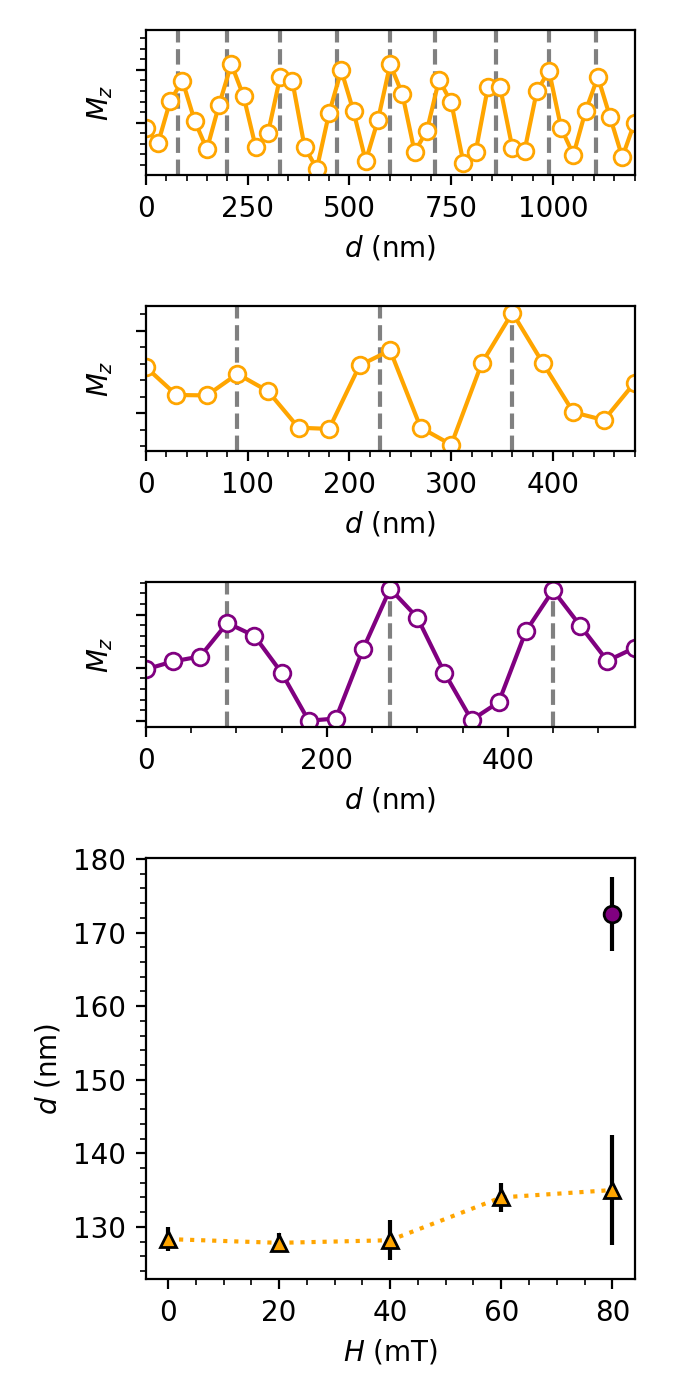

In [173]:
### Line Scan Data ###
H_Fs = [0,20,40,60,80]
Heli = np.array([77/18,98/23,47/11,67/15,9/2])*30
eHeli = [30/18,30/23,30/11,30/15,30/4]
S_Fs = [80]
eSkT = [30/6]
SkT = np.array([12/2+22/4])*30/2

plt.figure(figsize=(3.5,7))

ax1=plt.subplot2grid((5,1),(0,0), rowspan=1,colspan=1)
plt.axvline(80,color='grey',ls="--")
plt.axvline(200,color='grey',ls="--")
plt.axvline(330,color='grey',ls="--")
plt.axvline(470,color='grey',ls="--")
plt.axvline(600,color='grey',ls="--")
plt.axvline(710,color='grey',ls="--")
plt.axvline(860,color='grey',ls="--")
plt.axvline(990,color='grey',ls="--")
plt.axvline(1106,color='grey',ls="--")
plt.plot(px_Helix,line_Helix,marker='o',color='orange',markerfacecolor='w')
plt.xlim([0,1200])
ax1.set_yticklabels([])
ax1.minorticks_on()
plt.ylabel('$M_z$')
plt.xlabel('$d$ (nm)')

ax1=plt.subplot2grid((5,1),(1,0), rowspan=1,colspan=1)
plt.axvline(90,color='grey',ls="--")
plt.axvline(230,color='grey',ls="--")
plt.axvline(360,color='grey',ls="--")
plt.plot(px_Cone,line_Cone,marker='o',color='orange',markerfacecolor='w')
plt.xlim([0,480])
ax1.set_yticklabels([])
ax1.minorticks_on()
plt.ylabel('$M_z$')
plt.xlabel('$d$ (nm)')

ax1=plt.subplot2grid((5,1),(2,0), rowspan=1,colspan=1)
plt.axvline(90,color='grey',ls="--")
plt.axvline(270,color='grey',ls="--")
plt.axvline(450,color='grey',ls="--")
plt.plot(px_SkT[:-2],line_SkT[2:],marker='o',color='purple',markerfacecolor='w')
plt.xlim([0,540])
ax1.set_yticklabels([])
ax1.minorticks_on()
plt.ylabel('$M_z$')
plt.xlabel('$d$ (nm)')

ax1=plt.subplot2grid((5,1),(3,0), rowspan=2,colspan=1)

plt.plot(H_Fs,Heli,marker='^',color='orange',markeredgecolor='k',ls=':')
plt.errorbar(H_Fs,Heli,eHeli,color='k',ls='')
plt.plot(S_Fs,SkT,marker='o',color='purple',markeredgecolor='k',ls='')
plt.errorbar(S_Fs,SkT,eSkT,color='k',ls='')

plt.ylabel('$d$ (nm)')
plt.xlabel('$H$ (mT)')
ax1.minorticks_on()


plt.tight_layout()
plt.savefig('distances_ZFC_IP.png',dpi=300)

